In [1]:
import os
import ee
import datetime
import time
import sklearn
import importlib

import geopandas as gp
import pandas as pd
import numpy as np
import rsfuncs as rs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

from tqdm import tqdm_notebook as tqdm
# tqdm().pandas()

ee.Initialize()
%load_ext autoreload
%autoreload 2

In [2]:
# Load cv shapefile
cvsa = gp.read_file("../shape/cv.shp")
crs = {"init":"epsg:4326"}
cvsa.crs = crs

# CVW shapefile 
cvw = gp.read_file("../shape/cvws.shp")

# grace footprint
grace_sa = gp.read_file("../shape/argus_grace.shp")


In [3]:
# Make EE objects from shapefiles 

In [4]:
area_cv = rs.gdf_to_ee_poly(cvsa)

In [5]:
area_cvw = rs.gdf_to_ee_poly(cvw)

In [6]:
data = rs.load_data()

In [7]:
strstart = '2001-01-01'
strend = '2019-12-31'

startdate = datetime.datetime.strptime(strstart, "%Y-%m-%d")
enddate = datetime.datetime.strptime(strend, "%Y-%m-%d")


In [8]:
# Precip

prism = rs.calc_monthly_sum(data['prism'], startdate, enddate, area_cvw)
trmm = rs.calc_monthly_sum(data['trmm'], startdate, enddate, area_cvw)
dmet = rs.calc_monthly_sum(data['dmet'], startdate, enddate, area_cvw)
chirps = rs.calc_monthly_sum(data['chirps'], startdate, enddate, area_cvw)
psn = rs.calc_monthly_sum(data['persiann'], startdate, "2018-12-31", area_cvw) # Not available through 2019

processing:
OREGONSTATE/PRISM/AN81m/189501



processing:
TRMM/3B43V7/3B43_19980101_7



processing:
NASA/ORNL/DAYMET_V3/19800101



processing:
UCSB-CHG/CHIRPS/PENTAD/19810101



processing:
NOAA/PERSIANN-CDR/19830101


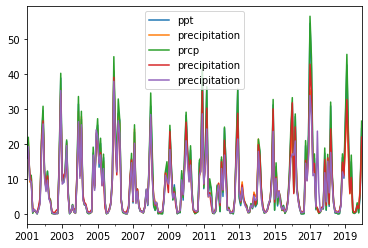

In [9]:
ax = prism.plot()
trmm.plot(ax=ax)
dmet.plot(ax=ax)
chirps.plot(ax=ax)
psn.plot(ax=ax)

In [10]:
# Aet

modis_aet = rs.calc_monthly_sum(data['modis_aet'], startdate, enddate, area_cvw)
gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], startdate, enddate, area_cvw)
tc_aet = rs.calc_monthly_sum(data['tc_aet'], startdate, enddate, area_cvw)
fldas_aet = rs.calc_monthly_sum(data['fldas_aet'], startdate, enddate, area_cvw)


processing:
MODIS/006/MOD16A2/2001_01_01



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
IDAHO_EPSCOR/TERRACLIMATE/195801



processing:
NASA/FLDAS/NOAH01/C/GL/M/V001/198201


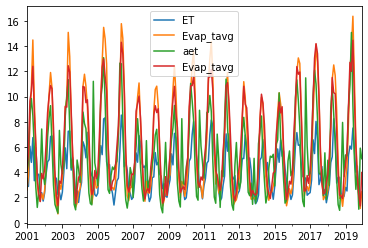

In [11]:
ax = modis_aet.plot()
gldas_aet.plot(ax=ax)
tc_aet.plot(ax=ax)
fldas_aet.plot(ax=ax)

In [12]:
# PET
gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], startdate, enddate, area_cvw)
modis_pet = rs.calc_monthly_sum(data['modis_pet'], startdate, enddate, area_cvw)
nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], startdate, enddate, area_cvw)
tc_pet = rs.calc_monthly_sum(data['tc_pet'], startdate, enddate, area_cvw)
gmet_eto = rs.calc_monthly_sum(data['gmet_eto'], startdate, enddate, area_cvw)

processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
MODIS/006/MOD16A2/2001_01_01



processing:
NASA/NLDAS/FORA0125_H002/A19790101_1300



processing:
IDAHO_EPSCOR/TERRACLIMATE/195801



processing:
IDAHO_EPSCOR/GRIDMET/19790101


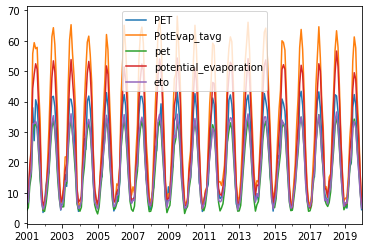

In [13]:
ax = modis_pet.plot()
gldas_pet.plot(ax=ax)
tc_pet.plot(ax=ax)
nldas_pet.plot(ax=ax)
gmet_eto.plot(ax = ax)

In [14]:
# SM

smos_ssm = rs.calc_monthly_mean(data['smos_ssm'], "2010-01-01", enddate, area_cvw)
smos_susm = rs.calc_monthly_mean(data['smos_susm'],"2010-01-01", enddate, area_cvw)
smos_smp = rs.calc_monthly_mean(data['smos_smp'],"2010-01-01", enddate, area_cvw)
smos_sm = pd.concat([smos_ssm, smos_susm], axis = 1).sum(axis =1)

tc_sm = rs.calc_monthly_mean(data['tc_sm'], startdate, enddate, area_cvw)

gldas_rzsm = rs.calc_monthly_mean(data['gldas_rzsm'], startdate, enddate, area_cvw)
gldas_gsm1 = rs.calc_monthly_mean(data['gsm1'], startdate, enddate, area_cvw)
gldas_gsm2 = rs.calc_monthly_mean(data['gsm2'], startdate, enddate, area_cvw)
gldas_gsm3 = rs.calc_monthly_mean(data['gsm3'], startdate, enddate, area_cvw)
gldas_gsm4 = rs.calc_monthly_mean(data['gsm4'], startdate, enddate, area_cvw)
gldas_sm = pd.concat([gldas_gsm1,gldas_gsm2,gldas_gsm3,gldas_gsm4], axis = 1).sum(axis =1)

smap_ssm = rs.calc_monthly_mean(data['smap_ssm'], '2015-04-01', '2019-12-31', area_cvw)
smap_susm = rs.calc_monthly_mean(data['smap_susm'],'2015-04-01', '2019-12-31', area_cvw)
smap_smp = rs.calc_monthly_mean(data['smap_smp'],'2015-04-01', '2019-12-31', area_cvw)
smap_sm = pd.concat([smap_ssm, smap_susm], axis = 1).sum(axis =1)


processing:
NASA_USDA/HSL/soil_moisture/NASA_USDA_SM20100113_20100115



processing:
NASA_USDA/HSL/soil_moisture/NASA_USDA_SM20100113_20100115



processing:
NASA_USDA/HSL/soil_moisture/NASA_USDA_SM20100113_20100115



processing:
IDAHO_EPSCOR/TERRACLIMATE/195801



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA_USDA/HSL/SMAP_soil_moisture/NASA_USDA_SMAP_SM20150402_20150404



processing:
NASA_USDA/HSL/SMAP_soil_moisture/NASA_USDA_SMAP_SM20150402_20150404



processing:
NASA_USDA/HSL/SMAP_soil_moisture/NASA_USDA_SMAP_SM20150402_20150404


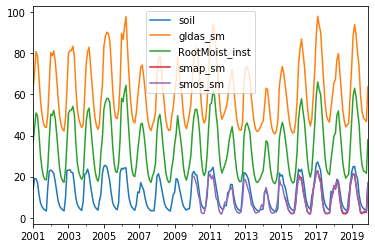

In [15]:
gldas_sm = pd.DataFrame(pd.concat([gldas_gsm1,gldas_gsm2,gldas_gsm3,gldas_gsm4], axis = 1).sum(axis =1))
gldas_sm.columns = ['gldas_sm']
smap_sm = pd.DataFrame(pd.concat([smap_ssm, smap_susm], axis = 1).sum(axis =1))
smap_sm.columns = ['smap_sm']
smos_sm = pd.DataFrame(pd.concat([smos_ssm, smos_susm], axis = 1).sum(axis =1))
smos_sm.columns = ['smos_sm']

ax = tc_sm.plot()
gldas_sm.plot(ax=ax)
gldas_rzsm.plot(ax=ax)
smap_sm.plot(ax=ax)
smos_sm.plot(ax=ax)

In [16]:
# SWe

In [17]:
gldas_swe = rs.calc_monthly_mean(data['gldas_swe'], startdate, enddate, area_cvw)
fldas_swe = rs.calc_monthly_mean(data['fldas_swe'],startdate, enddate, area_cvw)
dmet_swe = rs.calc_monthly_mean(data['dmet_swe'],startdate, enddate, area_cvw)
tc_swe = rs.calc_monthly_mean(data['tc_swe'],startdate, enddate, area_cvw)


processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA/FLDAS/NOAH01/C/GL/M/V001/198201



processing:
NASA/ORNL/DAYMET_V3/19800101



processing:
IDAHO_EPSCOR/TERRACLIMATE/195801


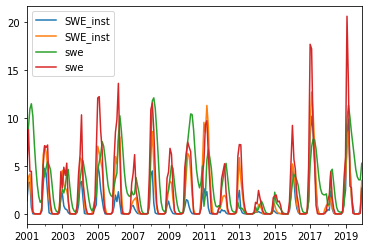

In [18]:
ax = gldas_swe.plot()
fldas_swe.plot(ax=ax)
dmet_swe.plot(ax=ax)
tc_swe.plot(ax=ax)

In [19]:
# R

tc_r = rs.calc_monthly_sum(data['tc_r'], startdate, enddate, area_cvw)
fldas_r = rs.calc_monthly_sum(data['fldas_r'], startdate, enddate, area_cvw)
gldas_ssr = rs.calc_monthly_sum(data['gldas_ssr'], startdate, enddate, area_cvw)
gldas_bfr = rs.calc_monthly_sum(data['gldas_bfr'], startdate, enddate, area_cvw)


processing:
IDAHO_EPSCOR/TERRACLIMATE/195801



processing:
NASA/FLDAS/NOAH01/C/GL/M/V001/198201



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000



processing:
NASA/GLDAS/V021/NOAH/G025/T3H/A20000102_0000


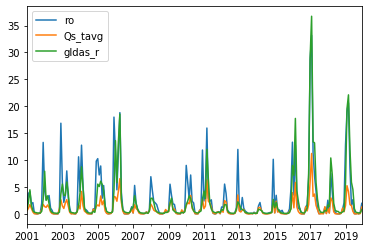

In [20]:
gldas_r = pd.DataFrame(pd.concat([gldas_bfr, gldas_ssr], axis = 1).sum(axis =1))
gldas_r.columns = ['gldas_r']

ax = tc_r.plot()
fldas_r.plot(ax=ax)
gldas_r.plot(ax=ax)

In [21]:
pdfs = {"p_prism":prism, "p_trmm":trmm, "p_dmet":dmet, "p_chirps": chirps, "p_psn":psn}
aetdfs = {"aet_modis":modis_aet, "aet_gldas":gldas_aet, "aet_tc":tc_aet, "aet_fldas":fldas_aet }
petdfs = {"pet_modis":modis_pet, "pet_gldas":gldas_pet, "pet_tc":tc_pet, "pet_nldas":nldas_pet, 'pet_gmet':gmet_eto }
smdfs = {"sm_smos": smos_sm, "sm_smap": smap_sm, "sm_tc": tc_sm, "sm_gldas": gldas_sm }
rdfs = {"r_tc": tc_r, "r_gldas": gldas_r, "r_fldas": fldas_r}
swedfs = {'swe_gldas': gldas_swe, 'swe_fldas': fldas_swe, 'swe_dmet':dmet_swe, "swe_tc":tc_swe}

In [22]:
master_df = []
for i in [pdfs, aetdfs,petdfs, smdfs, rdfs, swedfs]:
    for k,v in i.items():
        print(k,v.columns)
        newdf = v
        newdf.columns = [k + "_cvws"] 
        master_df.append(newdf)

p_prism Index(['ppt'], dtype='object')
p_trmm Index(['precipitation'], dtype='object')
p_dmet Index(['prcp'], dtype='object')
p_chirps Index(['precipitation'], dtype='object')
p_psn Index(['precipitation'], dtype='object')
aet_modis Index(['ET'], dtype='object')
aet_gldas Index(['Evap_tavg'], dtype='object')
aet_tc Index(['aet'], dtype='object')
aet_fldas Index(['Evap_tavg'], dtype='object')
pet_modis Index(['PET'], dtype='object')
pet_gldas Index(['PotEvap_tavg'], dtype='object')
pet_tc Index(['pet'], dtype='object')
pet_nldas Index(['potential_evaporation'], dtype='object')
pet_gmet Index(['eto'], dtype='object')
sm_smos Index(['smos_sm'], dtype='object')
sm_smap Index(['smap_sm'], dtype='object')
sm_tc Index(['soil'], dtype='object')
sm_gldas Index(['gldas_sm'], dtype='object')
r_tc Index(['ro'], dtype='object')
r_gldas Index(['gldas_r'], dtype='object')
r_fldas Index(['Qs_tavg'], dtype='object')
swe_gldas Index(['SWE_inst'], dtype='object')
swe_fldas Index(['SWE_inst'], dtype='obje

In [23]:
finout = pd.concat(master_df, axis = 1)

In [24]:
finout.to_csv('../data/RS_analysis_dat_cvws.csv')